In [2]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [3]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [4]:
df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0053_20220716", row_limit=0)
print(data_version_description)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49481/44256/44813/16764 ==> 24143/39943/39734/39750/16764
type <class 'pandas.core.indexes.base.Index'>
22124
21732
21699
21671
Shared ownership houses predict significantly higher than they should. I'm removing all the shared ownership properties I can find.
(21671, 16)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,,
118766921,600000.0,51.55362,-0.394900,0.3,3.0,1.0,17,20220115,12.0,NaN,Hillingdon,Houses,Semi-Detached,HA,FREEHOLD,Offers Over
119544071,400000.0,51.346665,-0.017425,0.2,2.0,1.0,21,20220204,4.0,37.0,Croydon,Houses,Semi-Detached,CR,FREEHOLD,None
112913780,420000.0,51.413829,-0.362750,0.4,2.0,2.0,10,20210903,4.0,NaN,Richmond upon Thames,Flats / Apartments,Apartment,TW,LEASEHOLD,None
121750481,350000.0,51.526088,-0.062687,0.2,2.0,1.0,5,20220330,4.0,37.0,Tower Hamlets,Flats / Apartments,Flat,E,NaN,None
123005996,475000.0,51.511699,-0.069102,0.2,1.0,1.0,10,20220503,4.0,25.0,Tower Hamlets,Flats / Apartments,Apartment,E,LEASEHOLD,None
123995162,420000.0,51.412242,-0.292045,0.4,2.0,1.0,9,20220616,4.0,37.0,Kingston upon Thames,Flats / Apartments,Flat,KT,LEASEHOLD,Guide Price
121068284,375000.0,51.42012,-0.141420,0.2,3.0,1.0,9,20220314,4.0,37.0,Wandsworth,Flats / Apartments,Flat,SW,LEASEHOLD,Guide Price
113121710,285000.0,51.442201,0.018857,0.6,2.0,1.0,11,20210907,8.0,37.0,Lewisham,Flats / Apartments,Flat,SE,SHARE_OF_FREEHOLD,Guide Price
111159506,535000.0,51.398303,-0.166584,0.2,4.0,2.0,13,20210729,4.0,NaN,Merton,Houses,Terraced,CR,NaN,None


In [5]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21671 entries, 85780593 to 114438299
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price                             21671 non-null  float64
 1   location.latitude                 21669 non-null  float64
 2   location.longitude                21671 non-null  float64
 3   distance_to_any_train             21671 non-null  float64
 4   bedrooms_model                    21671 non-null  float64
 5   bathrooms_model                   21671 non-null  float64
 6   analyticsProperty.imageCount      21671 non-null  int64  
 7   analyticsProperty.added           21671 non-null  int64  
 8   floorplan_count                   21671 non-null  float64
 9   borough_name                      21671 non-null  object 
 10  analyticsProperty.propertyType    21671 non-null  object 
 11  propertySubType                   21669 non-null  object 
 12

In [7]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,
85170690,500000.0,51.514840,-0.432590,1.0,4.0,1.0,14,20220505,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
104183660,500000.0,51.545131,-0.439493,0.7,4.0,2.0,13,20210316,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Guide Price
106171337,500000.0,51.596492,-0.398523,0.5,2.0,2.0,17,20210429,4.0,Hillingdon,Houses,End of Terrace,HA,NaN,Offers in Excess of
124690724,500000.0,51.499580,-0.435130,0.7,3.0,1.0,18,20220705,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
124933595,500000.0,51.526210,-0.447270,1.6,3.0,1.0,17,20220713,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,Offers in Excess of
84995322,500000.0,51.482720,-0.424470,1.1,3.0,1.0,9,20220428,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
116741378,500000.0,51.615757,-0.441540,0.8,2.0,1.0,13,20211123,4.0,Hillingdon,Houses,Semi-Detached,HA,NaN,Guide Price
109734920,500000.0,51.507920,-0.406600,0.7,3.0,1.0,18,20210630,4.0,Hillingdon,Houses,Terraced,UB,NaN,None
125008355,500000.0,51.529630,-0.416220,1.8,3.0,2.0,14,20220715,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Offers Over


In [8]:
df.dropna(inplace=True)

In [9]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [10]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    df = num_pipeline.fit_transform(df)
else:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  # define the transformer for categorical columns

    numeric_no_scale_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
    ])  # define the transformer for categorical columns

    categorical_transformer1 = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    categorical_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    features_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1,
             ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType', 'analyticsProperty.priceQualifier']),  #
            ('categorical2', categorical_transformer2, [])
        ])
    features_noscale_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_no_scale_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1, ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType']),
            ('categorical2', categorical_transformer2, [])
        ])
features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType',
                                  'analyticsProperty.priceQualifier']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [11]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

Now working on LinR model...
   LinR cross-validating...
   LinR fitting...
   LinR predicting...
LinR
   LinR compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
123010193  585000.0   316928.0    268072.0   45.824274
122726723  175000.0   395584.0    220584.0  126.048000
69820884   599000.0   379264.0    219736.0   36.683806
123479057  550000.0   331456.0    218544.0   39.735273
116592320  279950.0   485120.0    205170.0   73.288087
             actual  predicted  difference      % diff
ids                                                   
122726723  175000.0   395584.0    220584.0  126.048000
122192618  165000.0   363968.0    198968.0  120.586667
122713577  190000.0   336704.0    146704.0   77.212632
116592320  279950.0   485120.0    205170.0   73.288087
123476018  215000.0   371392.0    156392.0   72.740465
             actual  predicted  difference    % diff
ids                               

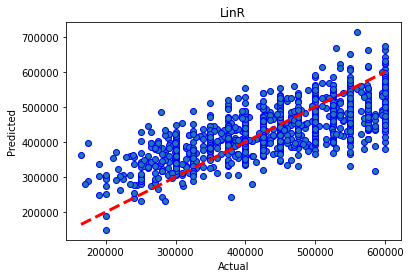

Now working on LinR Dupl model...
   LinR Dupl cross-validating...
   LinR Dupl fitting...
   LinR Dupl predicting...
LinR Dupl
   LinR Dupl compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
123010193  585000.0   316928.0    268072.0   45.824274
122726723  175000.0   395584.0    220584.0  126.048000
69820884   599000.0   379264.0    219736.0   36.683806
123479057  550000.0   331456.0    218544.0   39.735273
116592320  279950.0   485120.0    205170.0   73.288087
             actual  predicted  difference      % diff
ids                                                   
122726723  175000.0   395584.0    220584.0  126.048000
122192618  165000.0   363968.0    198968.0  120.586667
122713577  190000.0   336704.0    146704.0   77.212632
116592320  279950.0   485120.0    205170.0   73.288087
123476018  215000.0   371392.0    156392.0   72.740465
             actual  predicted  difference    % diff
ids 

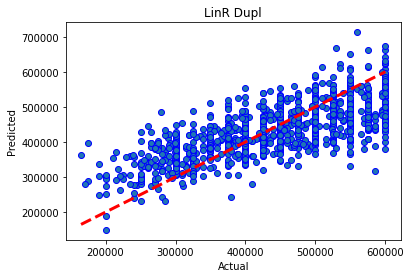

Now working on LinR noscale model...
   LinR noscale cross-validating...
   LinR noscale fitting...
   LinR noscale predicting...
LinR noscale
   LinR noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
123010193  585000.0  314733.566932  270266.433068   46.199390
69820884   599000.0  375138.812494  223861.187506   37.372485
123479057  550000.0  328390.011137  221609.988863   40.292725
122726723  175000.0  394362.650258  219362.650258  125.350086
116592320  279950.0  490692.237726  210742.237726   75.278527
             actual      predicted     difference      % diff
ids                                                          
122192618  165000.0  373765.015948  208765.015948  126.524252
122726723  175000.0  394362.650258  219362.650258  125.350086
122713577  190000.0  342539.149232  152539.149232   80.283763
116592320  279950.0  490692.237726  210742.237726   75.278527
117

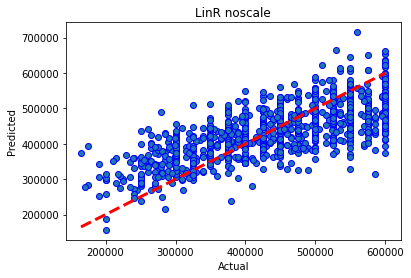

Now working on Ridge LR model...
   Ridge LR cross-validating...
   Ridge LR fitting...
   Ridge LR predicting...
Ridge LR
   Ridge LR compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
123010193  585000.0  319489.941531  265510.058469   45.386335
122726723  175000.0  397109.662330  222109.662330  126.919807
69820884   599000.0  379324.557560  219675.442440   36.673697
123479057  550000.0  334056.512648  215943.487352   39.262452
116592320  279950.0  483499.913521  203549.913521   72.709382
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  397109.662330  222109.662330  126.919807
122192618  165000.0  360769.637993  195769.637993  118.648265
122713577  190000.0  336476.684432  146476.684432   77.092992
116592320  279950.0  483499.913521  203549.913521   72.709382
117071834  250000.0  428268

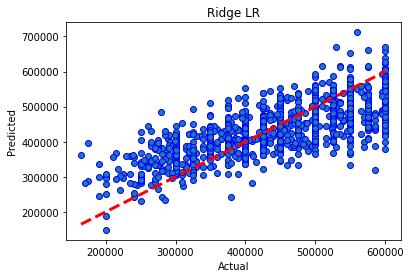

Now working on Ridge LR noscale model...
   Ridge LR noscale cross-validating...
   Ridge LR noscale fitting...
   Ridge LR noscale predicting...
Ridge LR noscale
   Ridge LR noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
123010193  585000.0  314400.525717  270599.474283   46.256320
69820884   599000.0  375522.188466  223477.811534   37.308483
123479057  550000.0  328077.003556  221922.996444   40.349636
122726723  175000.0  394482.146714  219482.146714  125.418370
116592320  279950.0  489928.974854  209978.974854   75.005885
             actual      predicted     difference      % diff
ids                                                          
122192618  165000.0  374047.393928  209047.393928  126.695390
122726723  175000.0  394482.146714  219482.146714  125.418370
122713577  190000.0  341427.059023  151427.059023   79.698452
116592320  279950.0  489928.974854  20997

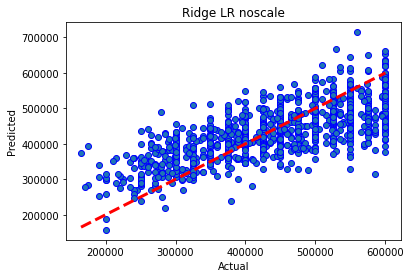

Now working on Ridge LR Best noscale model...
   Ridge LR Best noscale cross-validating...
   Ridge LR Best noscale fitting...
   Ridge LR Best noscale predicting...
Ridge LR Best noscale
   Ridge LR Best noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
121089995  600000.0  368601.839107  231398.160893   38.566360
124269563  600000.0  378147.730221  221852.269779   36.975378
122726723  175000.0  396480.755393  221480.755393  126.560432
123010193  585000.0  366692.523697  218307.476303   37.317517
121678103  200000.0  415527.412643  215527.412643  107.763706
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  396480.755393  221480.755393  126.560432
122192618  165000.0  367456.875527  202456.875527  122.701137
120334940  170000.0  358100.024398  188100.024398  110.647073
121678103  

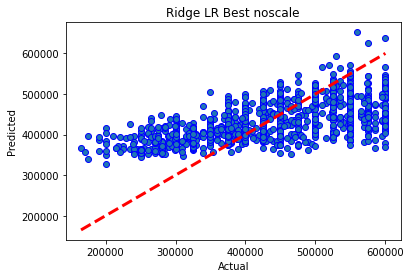

Now working on KNN Best model...
   KNN Best cross-validating...
   KNN Best fitting...
   KNN Best predicting...
KNN Best
   KNN Best compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  412597.282857  237597.282857  135.769876
123010193  585000.0  365761.245714  219238.754286   37.476710
121678103  200000.0  418912.694286  218912.694286  109.456347
122192618  165000.0  381531.560000  216531.560000  131.231248
116592320  279950.0  493603.642857  213653.642857   76.318501
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  412597.282857  237597.282857  135.769876
122192618  165000.0  381531.560000  216531.560000  131.231248
121678103  200000.0  418912.694286  218912.694286  109.456347
122798156  200000.0  395925.857143  195925.857143   97.962929
114645770  200000.0  393318

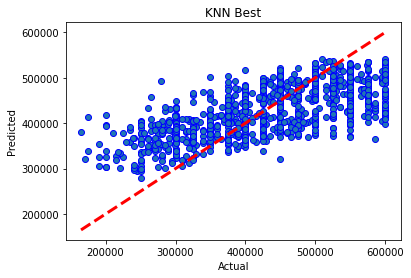

Now working on KNN model...
   KNN cross-validating...
   KNN fitting...
   KNN predicting...
KNN
   KNN compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
122726723  175000.0   445990.0    270990.0  154.851429
116592320  279950.0   550000.0    270050.0   96.463654
124450964  525000.0   275000.0    250000.0   47.619048
121910252  585000.0   356000.0    229000.0   39.145299
96566401   550000.0   326000.0    224000.0   40.727273
             actual  predicted  difference      % diff
ids                                                   
122726723  175000.0   445990.0    270990.0  154.851429
122192618  165000.0   338980.0    173980.0  105.442424
116592320  279950.0   550000.0    270050.0   96.463654
113319896  235000.0   423990.0    188990.0   80.421277
120535517  250000.0   439000.0    189000.0   75.600000
             actual  predicted  difference  % diff
ids                                       

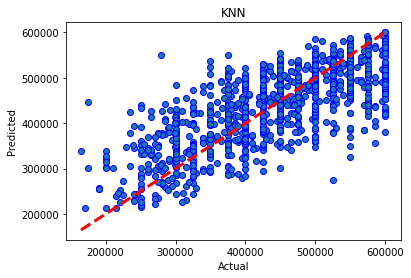

Now working on KNN noscale model...
   KNN noscale cross-validating...
   KNN noscale fitting...
   KNN noscale predicting...
KNN noscale
   KNN noscale compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
120473774  599000.0   333000.0    266000.0   44.407346
85384782   190000.0   455000.0    265000.0  139.473684
116070149  600000.0   345980.0    254020.0   42.336667
122713577  190000.0   432000.0    242000.0  127.368421
120799190  265000.0   505000.0    240000.0   90.566038
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   404990.0    239990.0  145.448485
85384782   190000.0   455000.0    265000.0  139.473684
122713577  190000.0   432000.0    242000.0  127.368421
84954213   189950.0   426000.0    236050.0  124.269545
121678103  200000.0   413000.0    213000.0  106.500000
             actual  predicted  difference  %

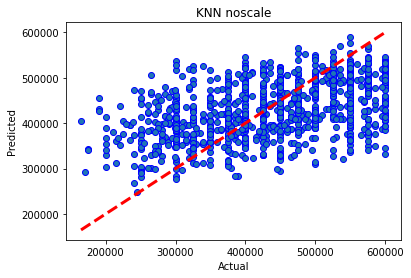

Now working on GNB model...
   GNB cross-validating...
   GNB fitting...
   GNB predicting...
GNB
   GNB compare actual and predicted...
             actual  predicted  difference     % diff
ids                                                  
120781745  600000.0   150000.0    450000.0  75.000000
120056534  585000.0   185000.0    400000.0  68.376068
116070149  600000.0   239950.0    360050.0  60.008333
122598959  550000.0   190000.0    360000.0  65.454545
124505312  600000.0   255000.0    345000.0  57.500000
             actual  predicted  difference      % diff
ids                                                   
122726723  175000.0   439500.0    264500.0  151.142857
117564950  275000.0   599999.0    324999.0  118.181455
119430542  260000.0   559000.0    299000.0  115.000000
121204166  270000.0   562000.0    292000.0  108.148148
123732347  285000.0   569950.0    284950.0   99.982456
             actual  predicted  difference  % diff
ids                                              

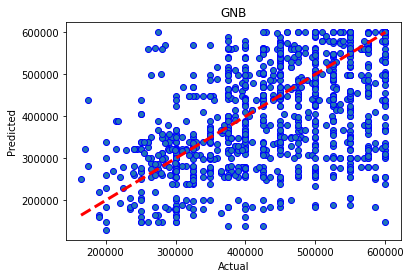

Now working on GNB noscale model...
   GNB noscale cross-validating...
   GNB noscale fitting...
   GNB noscale predicting...
GNB noscale
   GNB noscale compare actual and predicted...
             actual  predicted  difference     % diff
ids                                                  
120781745  600000.0   150000.0    450000.0  75.000000
124089272  540000.0   140000.0    400000.0  74.074074
121089995  600000.0   239000.0    361000.0  60.166667
124269563  600000.0   242000.0    358000.0  59.666667
123532979  550000.0   199999.0    350001.0  63.636545
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   447500.0    282500.0  171.212121
119430542  260000.0   559000.0    299000.0  115.000000
122726723  175000.0   359000.0    184000.0  105.142857
122189180  275000.0   562000.0    287000.0  104.363636
123732347  285000.0   569950.0    284950.0   99.982456
             actual  predicted  difference  % diff
i

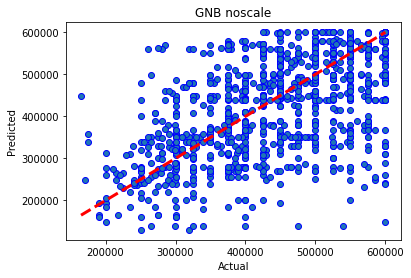

Now working on GNB Best model...
   GNB Best cross-validating...
   GNB Best fitting...
   GNB Best predicting...
GNB Best
   GNB Best compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   450000.0    285000.0  172.727273
120334940  170000.0   450000.0    280000.0  164.705882
122726723  175000.0   450000.0    275000.0  157.142857
113983094  175000.0   450000.0    275000.0  157.142857
84954213   189950.0   450000.0    260050.0  136.904449
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   450000.0    285000.0  172.727273
120334940  170000.0   450000.0    280000.0  164.705882
122726723  175000.0   450000.0    275000.0  157.142857
113983094  175000.0   450000.0    275000.0  157.142857
84954213   189950.0   450000.0    260050.0  136.904449
             actual  predicted  difference  % diff
ids         

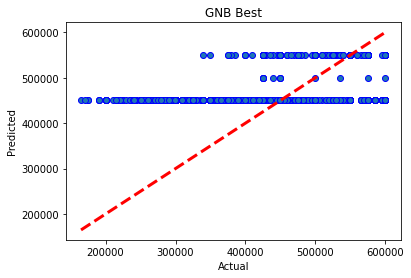

Now working on GNB Best noscale model...
   GNB Best noscale cross-validating...
   GNB Best noscale fitting...
   GNB Best noscale predicting...
GNB Best noscale
   GNB Best noscale compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   450000.0    285000.0  172.727273
120334940  170000.0   450000.0    280000.0  164.705882
73748226   270000.0   550000.0    280000.0  103.703704
113983094  175000.0   450000.0    275000.0  157.142857
122726723  175000.0   450000.0    275000.0  157.142857
             actual  predicted  difference      % diff
ids                                                   
122192618  165000.0   450000.0    285000.0  172.727273
120334940  170000.0   450000.0    280000.0  164.705882
113983094  175000.0   450000.0    275000.0  157.142857
122726723  175000.0   450000.0    275000.0  157.142857
84954213   189950.0   450000.0    260050.0  136.904449
             ac

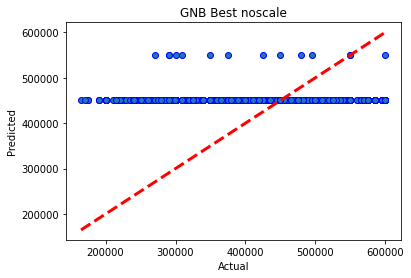

Now working on RF Best model...
   RF Best cross-validating...
   RF Best fitting...
   RF Best predicting...
RF Best
   RF Best compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  413229.483047  238229.483047  136.131133
122192618  165000.0  385392.493306  220392.493306  133.571208
120334940  170000.0  385392.493306  215392.493306  126.701467
124269563  600000.0  385802.843592  214197.156408   35.699526
121089995  600000.0  385802.843592  214197.156408   35.699526
             actual      predicted     difference      % diff
ids                                                          
122726723  175000.0  413229.483047  238229.483047  136.131133
122192618  165000.0  385392.493306  220392.493306  133.571208
120334940  170000.0  385392.493306  215392.493306  126.701467
113983094  175000.0  385615.732467  210615.732467  120.351847
121678103  200000.0  413229.48304

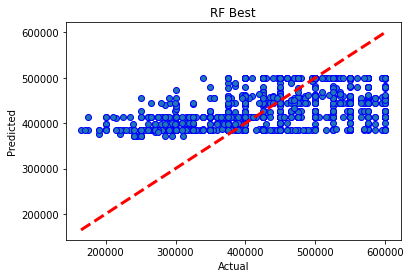

Now working on RF model...
   RF cross-validating...
   RF fitting...
   RF predicting...
RF
   RF compare actual and predicted...
             actual  predicted  difference     % diff
ids                                                  
116592320  279950.0   548630.0    268680.0  95.974281
118925201  600000.0   395096.5    204903.5  34.150583
85611873   570000.0   370294.0    199706.0  35.036140
124367828  350000.0   539095.0    189095.0  54.027143
117071834  250000.0   429648.5    179648.5  71.859400
             actual      predicted     difference     % diff
ids                                                         
116592320  279950.0  548630.000000  268680.000000  95.974281
122192618  165000.0  315297.000000  150297.000000  91.089091
122726723  175000.0  317305.666667  142305.666667  81.317524
117071834  250000.0  429648.500000  179648.500000  71.859400
102436643  300000.0  475096.950000  175096.950000  58.365650
             actual  predicted  difference    % diff
ids        

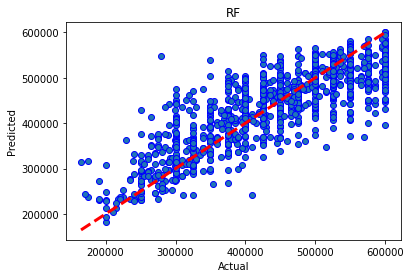

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,LinR,1,0.628475,0.050093,-1.134435e+13,-2.591982e+29,-5.091151e+14
1,LinR,2,0.425758,0.097549,-5.898115e+04,-5.472696e+09,-7.397767e+04
2,LinR,3,0.592197,0.037457,-2.305250e+13,-2.058712e+30,-1.434821e+15
3,LinR,4,0.537681,0.076880,-5.821984e+04,-5.366370e+09,-7.325551e+04
4,LinR,5,0.332027,0.035336,-5.877079e+04,-5.425900e+09,-7.366071e+04
5,LinR Dupl,1,0.356822,0.074050,-1.134435e+13,-2.591982e+29,-5.091151e+14
6,LinR Dupl,2,0.393662,0.063482,-5.898115e+04,-5.472696e+09,-7.397767e+04
7,LinR Dupl,3,0.365933,0.043873,-2.305250e+13,-2.058712e+30,-1.434821e+15
8,LinR Dupl,4,0.401665,0.062855,-5.821984e+04,-5.366370e+09,-7.325551e+04
9,LinR Dupl,5,0.398663,0.076190,-5.877079e+04,-5.425900e+09,-7.366071e+04


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge


def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
        ('LinR', LinearRegression()),
        ('LinR Dupl', LinearRegression()),
        ('LinR noscale', LinearRegression()),
        ('Ridge LR', linear_model.Ridge(alpha=.5)),
        ('Ridge LR noscale', linear_model.Ridge(alpha=.5)),
        ('Ridge LR Best noscale', Ridge(alpha=5000, max_iter=50)),
        ('KNN Best', KNeighborsRegressor(leaf_size=5, n_neighbors=350)),
        ('KNN', KNeighborsRegressor()),
        ('KNN noscale', KNeighborsRegressor()),
        ('GNB', GaussianNB()),
        ('GNB noscale', GaussianNB()),
        ('GNB Best', GaussianNB(var_smoothing=10)),
        ('GNB Best noscale', GaussianNB(var_smoothing=10)),

        ('RF Best', RandomForestRegressor(max_features=50, max_leaf_nodes=3, n_estimators=200)),
        ('RF', RandomForestRegressor()),
        #('SVM', SVR()),
        #('XGB', XGBClassifier())
        #x('LogReg Cl', LogisticRegression()),
        #x('RF Cl', RandomForestClassifier()),
        #x('KNN Cl', KNeighborsClassifier()),
        #x('SVM Cl', SVC()),
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']  #, 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'
    # ,'d2_absolute_error_score','d2_pinball_score','d2_tweedie_score'
    target_names = ['malignant', 'benign']
    for name, model in models:
        print(f"Now working on {name} model...")
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        print(f"   {name} cross-validating...")
        if 'noscale' in name:
            pipe = Pipeline(steps=[
                ('preprocessor', features_noscale_preprocessor),  # preprocess features
                ('estimator', model),
            ])  # start the training
        else:
            pipe = Pipeline(steps=[
                ('preprocessor', features_preprocessor),
                ('estimator', model),  # preprocess features
            ])  # start the training
        pipe.fit(X_train, y_train)
        ###print(X_train.head(5))
        ###print(y_train.head(5))
        cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring)

        print(f"   {name} fitting...")
        #clf = model.fit(X_train, y_train)

        print(f"   {name} predicting...")
        #y_pred = clf.predict(X_test)
        y_pred = pipe.predict(X_test)
        print(name)
        mae = metrics.mean_absolute_error(y_test, y_pred)  # NEW
        mse = metrics.mean_squared_error(y_test, y_pred)  # NEW
        r2 = metrics.r2_score(y_test, y_pred)  # NEW
        #print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        #this_df['model'] = name
        this_df.insert(loc=0, column='model', value=name)
        this_df.insert(loc=1, column='run', value=range(1, 6))
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

        print(f"   {name} compare actual and predicted...")
        df2 = X_test[['bedrooms_model', 'bathrooms_model']].copy()
        df2['actual'] = y_test
        #df2.reset_index(inplace=True)
        df2['predicted'] = y_pred
        df2['difference'] = abs(df2["actual"] - df2["predicted"])
        df2['% diff'] = (abs(df2["actual"] - df2["predicted"])) / df2["actual"] * 100
        df2 = df2[['actual', 'predicted', 'difference', '% diff']].sort_values(by='difference', ascending=False)
        df3 = df2[['actual', 'predicted', 'difference', '% diff']].sort_values(by='% diff', ascending=False)
        print(df2.head(5))
        print(df3.head(5))
        print(df2.tail(5))

        print(f"   {name} graphing...")
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
        ax.title.set_text(name)

        plt.show()

    #final.insert(loc=0, column='model2', value=names)
    return final


multi_model_evaluation = run_exps(X_train, y_train, X_test, y_test)
multi_model_evaluation

In [13]:
multi_model_evaluation.sort_values('test_neg_mean_squared_error')
multi_model_evaluation.sort_values('test_neg_mean_absolute_error', ascending=False)
multi_model_evaluation.sort_values('test_neg_root_mean_squared_error', ascending=False)

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
72,RF,3,22.425085,0.243667,-4.492427e+04,-3.546856e+09,-5.955549e+04
73,RF,4,27.525120,0.317093,-4.505081e+04,-3.597605e+09,-5.998004e+04
74,RF,5,20.389729,0.175754,-4.550819e+04,-3.669926e+09,-6.057992e+04
71,RF,2,17.725548,0.186423,-4.518142e+04,-3.697551e+09,-6.080749e+04
70,RF,1,24.524571,0.188093,-4.580001e+04,-3.716733e+09,-6.096501e+04
38,KNN,4,0.356490,1.667429,-5.501131e+04,-5.173583e+09,-7.192762e+04
17,Ridge LR,3,0.274871,0.106838,-5.831556e+04,-5.261328e+09,-7.253501e+04
37,KNN,3,0.153036,1.764733,-5.620887e+04,-5.284462e+09,-7.269431e+04
12,LinR noscale,3,0.522516,0.069494,-5.874262e+04,-5.345451e+09,-7.311259e+04
22,Ridge LR noscale,3,0.279002,0.043181,-5.875077e+04,-5.353777e+09,-7.316951e+04


In [1]:
multi_model_evaluation[multi_model_evaluation['model'] == 'RF']

NameError: name 'multi_model_evaluation' is not defined

In [14]:
#df.head()
#df.loc[123439364]
#df.loc[124483172]
# 85129713
# 119764643
# 111998573
# 85766559
#df.loc[df['id']==124483172]
#,119764643,111998573,85766559
df.loc[['123439364']]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,
123439364,425000.0,51.390103,-0.061155,0.2,3.0,1.0,12.0,20220518.0,4.0,Croydon,Character Property,Character Property,SE,FREEHOLD,None
